# Logistic Regression

## Name

## Class

## Date

In [20]:
# Import needed imports
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd
import statsmodels.api as sm
import time
from matplotlib import pyplot as plt

## Problem 1

Create a classifier called `LogiReg` that accepts an $(n \times 1)$ array $y$ of binary labels ($0$'s and $1$'s) as well as an $(n \times d)$ array $X$ of data points. Write a `fit()` method that finds and saves the optimal $\widehat{\boldsymbol{\beta}}$.

## Problem 2

Write a method called `predict_prob()` that accepts an $(n \times d)$ array $x\_test$ and returns $P(Y=1 | x\_test)$. Also write a method called `predict()` that calls `predict_prob()` and returns an array of predicted labels ($0$'s or $1$'s) for the given array $x\_test$.

In [115]:
class LogiReg(): 
    
    def fit(self, X, y):
        """
        input:
        X: ndarray(n, d)
        y: ndarray(n, 1) taking values only in {0,1}
        
        Save y and X as attributes.
        Updates beta, the coefficient array of shape (d, 1) that
        minimizes the negative log likelihood for the given data 
        with the model p(y|x) = sigm(x^T @ beta).      
        """
        
        
        # Get shape; make y an attribute
        n, d = X.shape
        self.y = y
        
        # Add a column of ones to X; make X an attribute
        col_ones = np.ones(n)
        self.X = np.column_stack((col_ones, X))
        
        # Define the log_likelihood function
        def calculate_log_likelihood(b):
            log_likelihood = 0
            for i in range(len(X)):
                log_likelihood += self.y[i] * np.log(1 + np.exp(-self.X[i].T @ b)) + (1-self.y[i]) * np.log(1 + np.exp(self.X[i].T @ b))
            return log_likelihood
        
        # Run the log_likelihood function
        log_likelihood_function = lambda b: calculate_log_likelihood(b)
        
        # Get the desired beta array
        result = minimize(log_likelihood_function, np.zeros(self.X.shape[1]))
        self.beta = result.x
        
     
    def predict_prob(self, x_test):
        """
        Returns the predicted probability of an input x_test.
        If x_test has shape (p, q), then the predicted probability
        has shape (1, q).
        """ 
        
        # Get and return predicted probabilities
        predicted_probabilities = 1/(1 + np.exp(-x_test @ self.beta))
        return predicted_probabilities
        
        
           
    def predict(self, x_test):
        """
        Returns the predicted classification (1 or 0) of x_test.
        If x_test has shape (p, q), then the predicted classification
        has shape (1, q).
        """ 
        
        # Add a column of ones to x_test
        x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))
        
        # Initialize predictions array
        predictions = []     
        
        # Get probabilities 
        probs = self.predict_prob(x_test)
        
        # Get predicted classifications
        for prob in probs:
            if prob >= 1/2:
                predictions.append(1)
            else:
                predictions.append(0)
    
        # Return the predicted classifications
        return np.array(predictions)
        
        

## Problem 3

Test your classifier from the previous two problems using arrays $X$, $y$, and $X\_test$. Train your classifier on $X$ and $y$. Then generate a list of predicted labels using your trained classifier and $X\_test$, and use it to plot $X\_test$ with a different color for each predicted label.

In [131]:
data = np.column_stack(( 
    np.concatenate(( 
        # draw from 2 2-dim. multivariate normal dists.
        np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
        np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) )), 
    # labels corresonding to each distribution
    np.concatenate(( np.zeros(100), np.ones(100) )) ))
np.random.shuffle(data)
# extract X and y from the shuffled data
X = data[:,:2]
y = data[:,2].astype(int)

X_test = np.concatenate(( 
    # draw from 2 identical 2-dim. multivariate normal dists.
    np.random.multivariate_normal(np.array([1,2]), np.eye(2), 100),
    np.random.multivariate_normal(np.array([4,3]), np.eye(2), 100) ))
np.random.shuffle(X_test)



# Make a LogiReg object, fit it and then predict y_test
prob_3_lr = LogiReg()
prob_3_lr.fit(X,y)
y_test = prob_3_lr.predict(X_test)





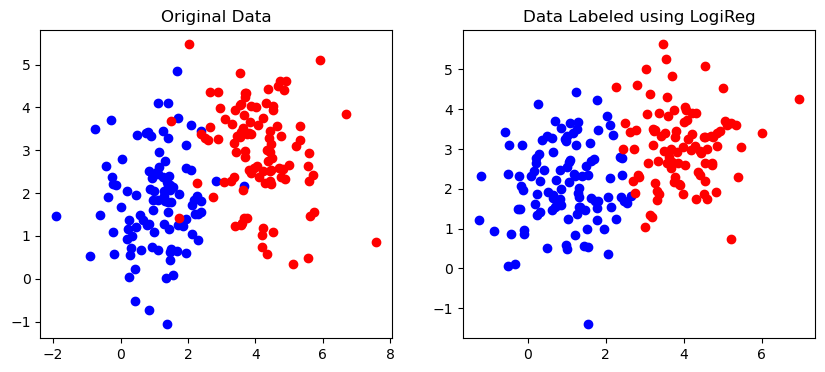

In [134]:
# Make subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

# Plot original data
ax1.scatter(X[:,0][y== 0], X[:, 1][y==0], color = 'blue')
ax1.scatter(X[:,0][y==1], X[:, 1][y==1], color = 'red')
ax1.set_title('Original Data')

# Plot data using LogiReg
ax2.scatter(X_test[:,0][y_test == 0], X_test[:, 1][y_test==0], color = 'blue')
ax2.scatter(X_test[:,0][y_test == 1], X_test[:, 1][y_test == 1], color = 'red')
ax2.set_title('Data Labeled using LogiReg')

# Show data
plt.show()

## Problem 4

Using each of `LogiReg`, `statsmodels.Logit`, `sklearn.LogisticRegression`, and `sklearn.svm` train a logistic regression classifier on $X$ and $y$ to generate a list of predicted labels for $X\_test$. Then, using $y\_test$, print the accuracy scores for each trained model. Compare the accuracies and training/testing time for all three classifiers. Be sure to add a constant feature with each model.

In [159]:
# predefine the true beta
beta = np.random.normal(0, 7, 20)

# X is generated from 2 20-dim. multivariate normal dists.
X = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20)*2, np.eye(20), 100) ))
np.random.shuffle(X)
# create y based on the true beta
pred = 1. / (1. + np.exp(-X @ beta))  
y = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )

# X_test and y_test are generated similar to X and y
X_test = np.concatenate(( 
        np.random.multivariate_normal(np.zeros(20), np.eye(20), 100), 
        np.random.multivariate_normal(np.ones(20), np.eye(20), 100) ))
np.random.shuffle(X_test)
pred = 1. / (1. + np.exp(-X_test @ beta))
y_test = np.array( [1 if pred[i] >= 1/2 else 0 
            for i in range(pred.shape[0])] )




In [160]:
# Use LogiReg

# Start time
time1_start = time.time()
# Make an object of LogiReg
prob_4_lr = LogiReg()
prob_4_lr.fit(X,y)

# Set predicted and true labels
pred_labels = prob_4_lr.predict(X_test)
true_labels = y_test

# Find accuracy score
score = accuracy_score(true_labels, pred_labels)

# Get total time
time1_end = time.time()
time1 = time1_end - time1_start



In [161]:
# LogiReg

print(f'Accuracy Score for LogiReg: {score} with Time: {time1} ')

Accuracy Score for LogiReg: 0.955 with Time: 2.872997999191284 


In [162]:
# Use sklearn.LogisticRegression

# Start time
time2_start = time.time()
# Make the model and get labels
lr_model = LogisticRegression(fit_intercept = True).fit(X,y)
lr_labels = lr_model.predict(X_test)

# Get score
score = lr_model.score(X_test, y_test)

# Get total time
time2_end = time.time()
time2 = time2_end - time2_start

# Find accuracy score
print(f'Accuracy Score for sklearn.LogisticRegression: {score} with Time: {time2}')


Accuracy Score for sklearn.LogisticRegression: 0.95 with Time: 0.009089231491088867


In [163]:
# Use sklearn.svm

# Start time
time3_start = time.time()
# Make the model and get labels
svm_model = svm.SVC(kernel = 'linear').fit(X,y)
pred_labels = svm_model.predict(X_test)
true_labels = y_test

# Find accuracy score
score = accuracy_score(true_labels, pred_labels)

# Get total time
time3_end = time.time()
time3 = time3_end - time3_start
print(f'Accuracy Score for sklearn.svm: {score} with Time: {time3}')


Accuracy Score for sklearn.svm: 0.955 with Time: 0.006815910339355469


## Problem 5

Import the Iris Dataset and perform a train-test split on only the first two columns of the data with `test_size=0.4`. Train a multinomial logistic regression model using the training data with an added constant feature, and generate prediction labels for the test data.

Plot the test data by color using your prediction labels. Also, print the model score

In [127]:
# Load in dataset
iris = datasets.load_iris()

# Get X, y
X = iris.data[:, :2]
y = iris.target

# Do a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [128]:
# Run a Multiclass Logistic Regression 
model = LogisticRegression(multi_class= 'multinomial', fit_intercept = True).fit(X_train, y_train)
y_test = model.predict(X_test)


Text(0, 0.5, 'Sepal Width')

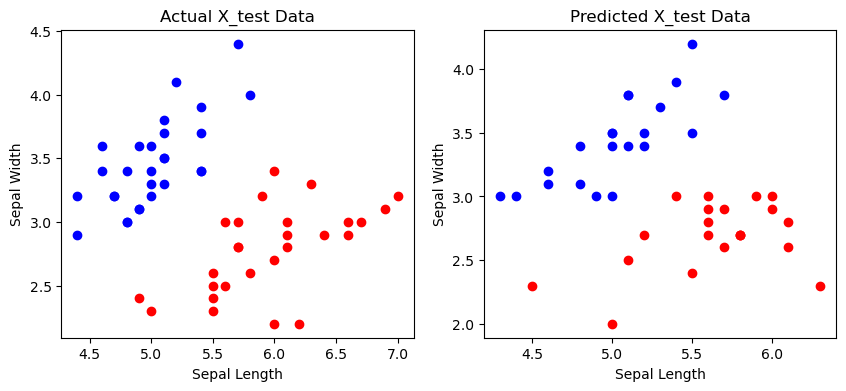

In [130]:
# Make subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

# Plot Actual Data
ax1.scatter(X_train[:,0][y_train== 0], X_train[:, 1][y_train==0], color = 'blue')
ax1.scatter(X_train[:,0][y_train==1], X_train[:, 1][y_train==1], color = 'red')
ax1.set_title('Actual X_test Data')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

# Pot Predicted Data
ax2.scatter(X_test[:,0][y_test == 0], X_test[:, 1][y_test==0], color = 'blue')
ax2.scatter(X_test[:,0][y_test == 1], X_test[:, 1][y_test == 1], color = 'red')
ax2.set_title('Predicted X_test Data')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')